## Transforming Dataset Scale

### Normalization

In [7]:
# Importing essential libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Loading the dataset
mtcars_dataset = pd.read_csv(R'..\data\mtcars.csv')

# Displaying the first few rows of the dataset
print(mtcars_dataset.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [9]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the 'disp' and 'hp' columns
mtcars_normalized = mtcars_dataset.copy()
mtcars_normalized[['disp', 'hp']] = scaler.fit_transform(mtcars_normalized[['disp', 'hp']])

# Display the normalized values
print(mtcars_normalized[['disp', 'hp']])

        disp        hp
0   0.221751  0.204947
1   0.221751  0.204947
2   0.092043  0.144876
3   0.466201  0.204947
4   0.720629  0.434629
5   0.383886  0.187279
6   0.720629  0.681979
7   0.188576  0.035336
8   0.173859  0.151943
9   0.240708  0.250883
10  0.240708  0.250883
11  0.510601  0.452297
12  0.510601  0.452297
13  0.510601  0.452297
14  1.000000  0.540636
15  0.970067  0.575972
16  0.920180  0.628975
17  0.018957  0.049470
18  0.011474  0.000000
19  0.000000  0.045936
20  0.122225  0.159011
21  0.615864  0.346290
22  0.580943  0.346290
23  0.695685  0.681979
24  0.820404  0.434629
25  0.019706  0.049470
26  0.122724  0.137809
27  0.059865  0.215548
28  0.698179  0.749117
29  0.184335  0.434629
30  0.573460  1.000000
31  0.124470  0.201413


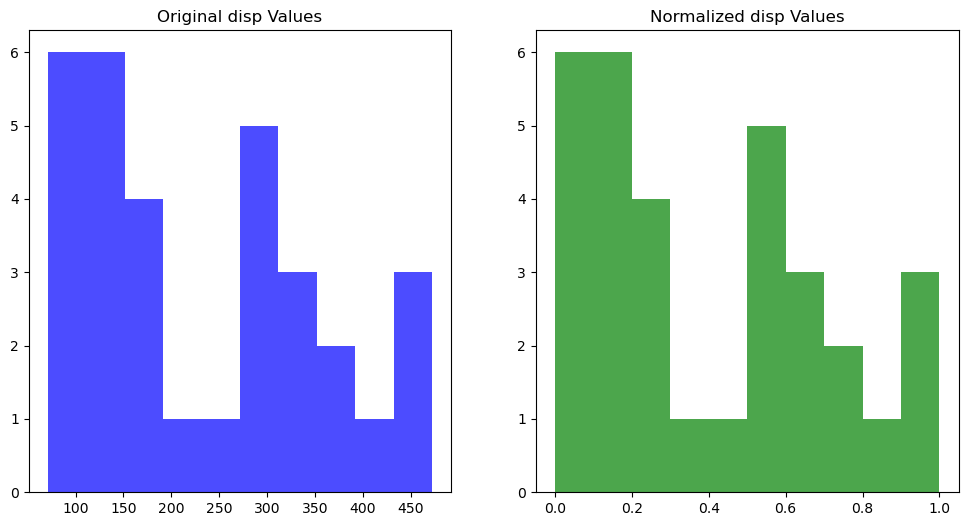

In [11]:
import matplotlib.pyplot as plt

# Plot original and normalized 'disp' side by side
plt.figure(figsize=(12, 6))

# Original values
plt.subplot(1, 2, 1)
plt.hist(mtcars_dataset['disp'], bins=10, color='blue', alpha=0.7)
plt.title('Original disp Values')

# Normalized values
plt.subplot(1, 2, 2)
plt.hist(mtcars_normalized['disp'], bins=10, color='green', alpha=0.7)
plt.title('Normalized disp Values')

plt.show()

### Standardization

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'disp' and 'hp' columns
mtcars_standardized = mtcars_dataset.copy()
mtcars_standardized[['disp', 'hp']] = scaler.fit_transform(mtcars_standardized[['disp', 'hp']])

# Display the standardized values
print(mtcars_standardized[['disp', 'hp']])


        disp        hp
0  -0.579750 -0.543655
1  -0.579750 -0.543655
2  -1.006026 -0.795570
3   0.223615 -0.543655
4   1.059772  0.419550
5  -0.046906 -0.617748
6   1.059772  1.456847
7  -0.688779 -1.254944
8  -0.737144 -0.765933
9  -0.517448 -0.351014
10 -0.517448 -0.351014
11  0.369533  0.493642
12  0.369533  0.493642
13  0.369533  0.493642
14  1.977904  0.864106
15  1.879533  1.012291
16  1.715580  1.234569
17 -1.246216 -1.195670
18 -1.270809 -1.403130
19 -1.308518 -1.210489
20 -0.906835 -0.736296
21  0.715472  0.049086
22  0.600705  0.049086
23  0.977795  1.456847
24  1.387676  0.419550
25 -1.243757 -1.195670
26 -0.905195 -0.825207
27 -1.111775 -0.499199
28  0.985993  1.738399
29 -0.702714  0.419550
30  0.576113  2.790515
31 -0.899457 -0.558473


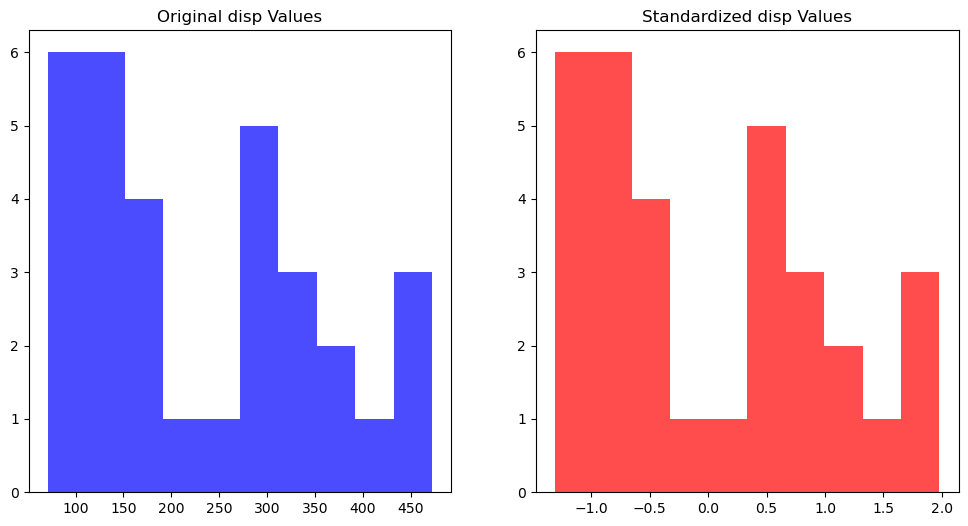

In [13]:
# Plot original and standardized 'disp' side by side
plt.figure(figsize=(12, 6))

# Original values
plt.subplot(1, 2, 1)
plt.hist(mtcars_dataset['disp'], bins=10, color='blue', alpha=0.7)
plt.title('Original disp Values')

# Standardized values
plt.subplot(1, 2, 2)
plt.hist(mtcars_standardized['disp'], bins=10, color='red', alpha=0.7)
plt.title('Standardized disp Values')

plt.show()

### Applied Machine Learning: A Starter Problem

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
# Drop the non-numeric 'Car Name' column
X = mtcars_dataset.drop(columns=['am'])  # Drop the target ('am')

# Check for other categorical columns and encode them
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical features if necessary

# Target variable remains unchanged
y = mtcars_dataset['am']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
# Predicting on the test set
y_pred = classifier.predict(X_test)

In [22]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.70


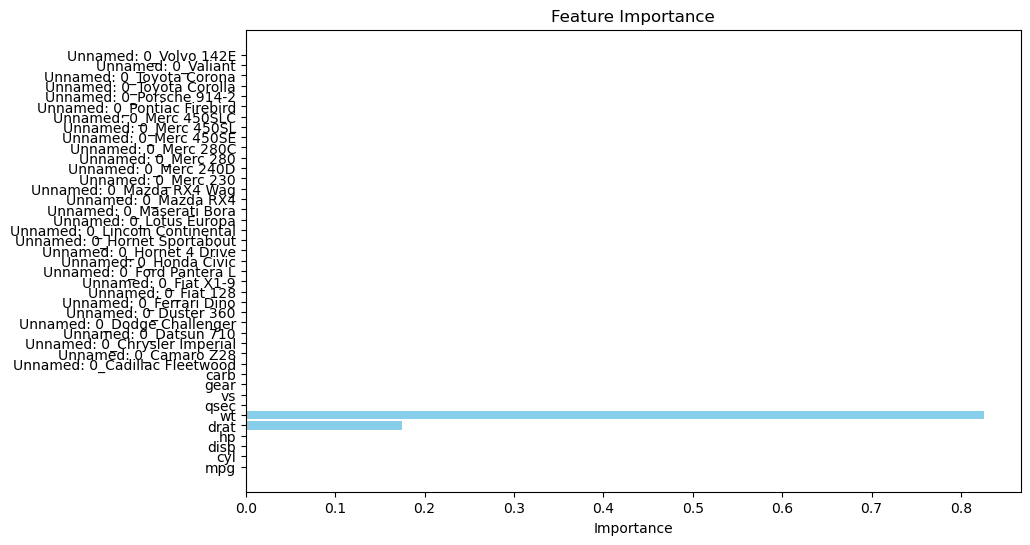

In [24]:
# Visualizing feature importance

feature_importance = classifier.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()